In [32]:
import os
import pickle
import copy

import numpy as np
import matplotlib.pyplot as plt

### step 1. specifiy a setting

In [33]:
# p = '1.5'
# T = 2000
# d = 5
# noise_free = False

In [34]:
p = 'inf'
T = 2000
d = 10
noise_free = False

### step 2. get all result file (including all learning rate scale)

In [35]:
root_path = '../results'

In [36]:
# find all the directories with regarding the setting we set above
dirs = []
for dirt in os.listdir(root_path):
    splits = dirt.split('-')
    if ('p={}'.format(p) in dirt) and ('T={}'.format(T)==splits[2]) \
        and ('d={}'.format(d) == splits[1]) and ('noise_free={}'.format(noise_free) in dirt):
        dirs.append(dirt)

In [37]:
algos = {
    'True': {},
    'False': {}
}

for dirt in dirs:
    path = os.path.join(root_path, dirt)
    scale = dirt.split('-')[3].split('=')[1]
    test_flag = dirt.split('-')[5].split('=')[1]
    
    files = os.listdir(path)
    
    if len(files) == 0:
        continue
        
    for file in files:
        print('loading:', os.path.join(path, file))
        f = pickle.load(open(os.path.join(path, file), 'rb'))
        
        algo = file.split('.')[0]
        if algo not in algos[test_flag]:
            algos[test_flag][algo] = {scale: f}
        else:
            algos[test_flag][algo][scale] = f
            

loading: ../results/p=inf-d=10-T=2000-scale=0.6-noise_free=False-test_flag=False/OFW_pge2.pkl
loading: ../results/p=inf-d=10-T=2000-scale=1.2-noise_free=False-test_flag=False/NoisySGD.pkl
loading: ../results/p=inf-d=10-T=2000-scale=0.8-noise_free=False-test_flag=True/OFW_pge2.pkl
loading: ../results/p=inf-d=10-T=2000-scale=0.8-noise_free=False-test_flag=True/NoisySGD.pkl
loading: ../results/p=inf-d=10-T=2000-scale=1.0-noise_free=False-test_flag=True/OFW_pge2.pkl
loading: ../results/p=inf-d=10-T=2000-scale=1.0-noise_free=False-test_flag=True/NoisySGD.pkl
loading: ../results/p=inf-d=10-T=2000-scale=0.4-noise_free=False-test_flag=False/NoisySGD.pkl
loading: ../results/p=inf-d=10-T=2000-scale=0.6-noise_free=False-test_flag=True/OFW_pge2.pkl
loading: ../results/p=inf-d=10-T=2000-scale=0.1-noise_free=False-test_flag=False/NoisySGD.pkl
loading: ../results/p=inf-d=10-T=2000-scale=2.0-noise_free=False-test_flag=True/NoisySGD.pkl
loading: ../results/p=inf-d=10-T=2000-scale=1.0-noise_free=False-t

### step 3. select the best curves over different lr-scale for each algo

In [38]:
 def collect_result_by_algo(algo, test_flag):
    ### collect all risk/time for each lr-scale
    
    results = algos[test_flag][algo]
    
    risk_dict = {}
    subopt_dict = {}
    time_dict = {}
    baseline_dict = {}
    test_iter_dict = {}

    for scale in results.keys():
        res = results[scale]

        risks = []
        subopts = []
        times = []
        baselines = []
        test_iters = []

        for r in res:
            
            times.append(copy.copy(r['result']['time']))
            
            if test_flag == 'True':
                test_iters.append([v[0] for v in r['result']['record']])
                risks.append([v[1] for v in r['result']['record']])
                subopts.append([v[2] for v in r['result']['record']])
                baselines.append(r['result']['baseline'][0])

        # time starts from 0
        for i in range(len(times)):
            times[i][0] = 0

        if test_flag == 'True':
            
            # subopts starts from 1
            for i in range(len(subopts)):
                subopts[i] = [1] + subopts[i]

            # risk starts from baseline
            for i in range(len(risks)):
                risks[i] = [baselines[i]] + risks[i]
                
            # test iteration starts from 0
            for i in range(len(test_iters)):
                test_iters[i] = [0] + test_iters[i]

        test_iters = np.array(test_iters)
        risks = np.array(risks)
        subopts = np.array(subopts)
        times = np.array(times)
        baselines = np.array(baselines)

        test_iter_dict[scale] = test_iters
        risk_dict[scale] = copy.copy(risks)
        subopt_dict[scale] = copy.copy(subopts)
        time_dict[scale] = copy.copy(times)
        baseline_dict[scale] = copy.copy(baselines)

    return risk_dict, subopt_dict, time_dict, baseline_dict, test_iter_dict

In [44]:
### plotting
def plot_single_algo(dicts, name, iter_scale=1, sci=False):
    
    f, ax = plt.subplots(figsize=(8,6))

    scales = list(dicts.keys())
    scales = sorted(scales)
    
    for scale in scales:
        data = dicts[scale]

        t = data.shape[1]
        x = np.arange(t)
        x = x * iter_scale

        y = data.mean(axis=0)
        error = data.std(axis=0)

        ax.plot(x, y, label='lr-scale={:.2f}'.format(float(scale)))
        plt.fill_between(x, y - error, y + error, alpha=0.2)
    
    plt.xlabel('#iteration', fontsize=25)
    plt.ylabel(name, fontsize=25)

#     plt.yticks(fontsize=15)
#     plt.xticks(fontsize=15)
    ax.tick_params(axis='both', labelsize=15)
    
    plt.xlim(0, x[-1])
    
    if sci is True:
        ax.ticklabel_format(axis='x', style='scientific', scilimits=(0,0))
        ax.xaxis.offsetText.set_fontsize(15)

    setting = 'p={} d={} T={} noise_free={}'.format(p, d, T, noise_free)
    #plt.title('{}\n{}\nn_obs:{}'.format(setting, algo, data.shape[1]), fontsize=20)

    plt.grid()
    plt.legend(fontsize=15)
    plt.show()

    return f

#### NoisySGD

In [40]:
algo = 'NoisySGD'
risk_dict, subopt_dict, time_dict, baseline_dict, test_iter_dict = collect_result_by_algo(algo, 'True')

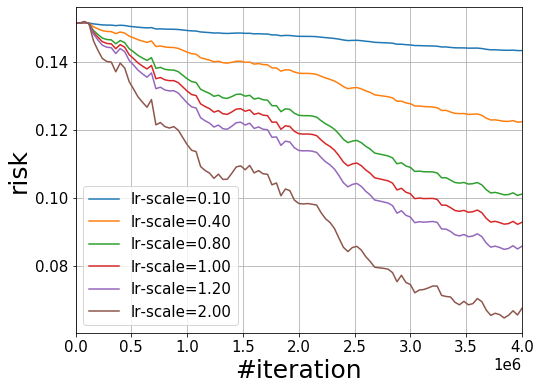

In [29]:
dicts = risk_dict
name = 'risk'
f = plot_single_algo(dicts, name, iter_scale=int(T**2)//100, sci=True)

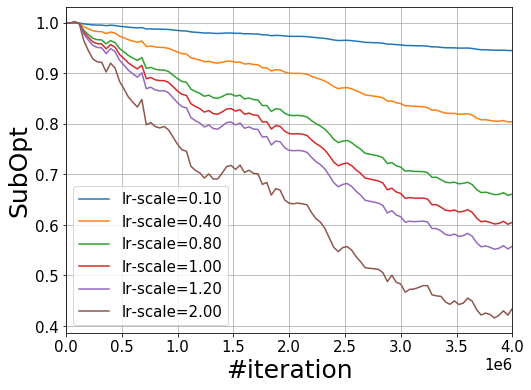

In [31]:
dicts = subopt_dict
name = 'SubOpt'
f = plot_single_algo(dicts, name, iter_scale=int(T**2)//100, sci=True)
f.savefig('./figure/subopt_{}_p{}_T{}_d{}.png'.format(algo, p, T, d), dpi=200)

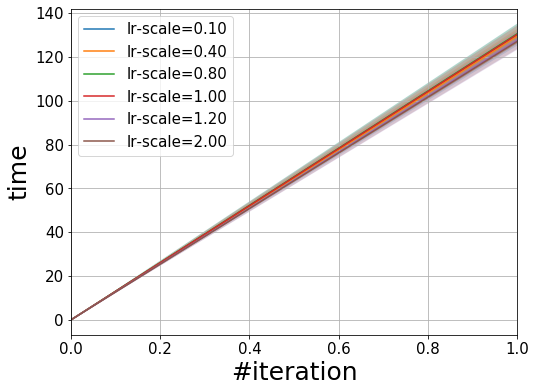

In [16]:
dicts = time_dict
name = 'time'
f = plot_single_algo(dicts, name)

#### OFW_ple2

In [45]:
algo = 'OFW_pge2'
risk_dict, subopt_dict, time_dict, baseline_dict, test_iter_dict = collect_result_by_algo(algo, 'True')

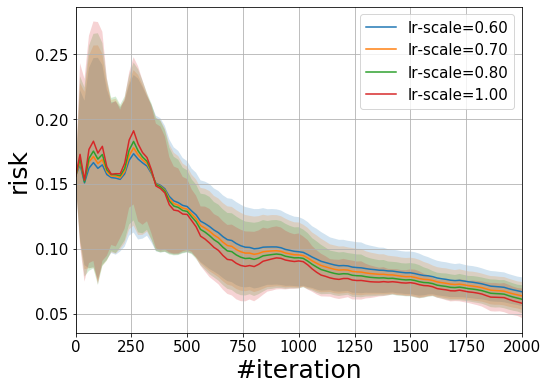

In [46]:
dicts = risk_dict
name = 'risk'
iter_scale = 20
f = plot_single_algo(dicts, name, iter_scale=iter_scale)

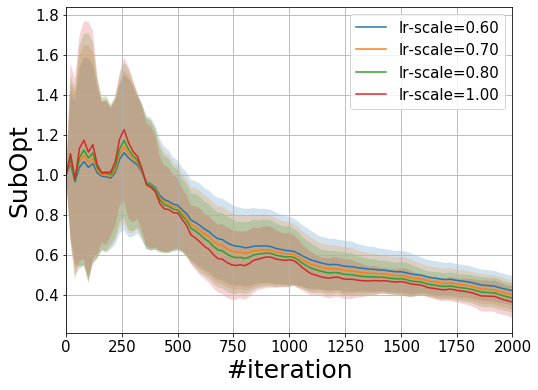

In [47]:
dicts = subopt_dict
name = 'SubOpt'
f = plot_single_algo(dicts, name, iter_scale=iter_scale)
f.savefig('./figure/subopt_{}_p{}_T{}_d{}.png'.format(algo, p, T, d), dpi=200)

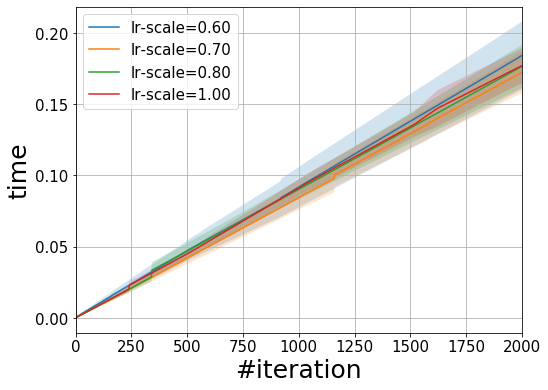

In [20]:
dicts = time_dict
name = 'time'
f = plot_single_algo(dicts, name, iter_scale=1)